# Iniciar o jupyter neste comando para ter mais limite

jupyter notebook --ServerApp.iopub_data_rate_limit=10000000



In [1]:
import json
import matplotlib.pyplot as plt
import random
import networkx as nx
# Manipulação de dados
import pickle
import pandas as pd
import numpy as np


import networkx as nx # Tratamamento de grafos

In [ ]:
# from google.colab import drive

# drive.mount('/content/drive')

In [ ]:
# link = '/content/drive/MyDrive/UFC_mestrado/Sigaa_UFC/2_semestre/estruturas_de_dados/Lista_02/testes/tb_whatsapp_messages_formatado.csv'

In [ ]:
#link = r'E:\Repositorio_Git\zz-grafos\tb_whatsapp_messages_formatado.csv'
#df = pd.read_csv(link)


In [2]:
# Carregando o arquivo json salvo
with open("E:/Repositorio_Git/user_graph.json", 'r', encoding='utf-8-sig') as f:
     graph_data = json.load(f)

In [3]:
# Função para converter o JSON em grafo
def criar_grafo_from_json(graph_data):
    # Utilizar a função node_link_graph para criar um grafo a partir dos dados JSON
    G = nx.Graph()

    # Adicionando nós ao grafo
    for node in graph_data['nodes']:
        G.add_node(node['id'], tipo=node['type'])

    # Adicionando arestas ao grafo
    for edge in graph_data['edges']:
        G.add_edge(edge['source'], edge['target'], relationship_type=edge['relationship_type'], weight=edge['weight'])

    return G


grafos = graph_data.copy()
grafo_geral = criar_grafo_from_json(grafos["general"])
grafo_viral = criar_grafo_from_json(grafos["viral"])
grafo_desinformacao = criar_grafo_from_json(grafos["misinformation"])


Código para Normalizar Identificadores

In [ ]:
print(f"Grafo Geral: Nós = {grafo_geral.number_of_nodes()}, Arestas = {grafo_geral.number_of_edges()}")
print(f"Grafo Viral: Nós = {grafo_viral.number_of_nodes()}, Arestas = {grafo_viral.number_of_edges()}")
print(f"Grafo Desinformação: Nós = {grafo_desinformacao.number_of_nodes()}, Arestas = {grafo_desinformacao.number_of_edges()}")


Grafo Geral: Nós = 7493, Arestas = 663096
Grafo Viral: Nós = 3484, Arestas = 126818
Grafo Desinformação: Nós = 2265, Arestas = 58424


Quantidade de nos e aresta do tipo geral

In [ ]:

print("Nós no grafo geral:", len(grafo_geral.nodes))
print("Arestas no grafo geral:", len(grafo_geral.edges))

Nós no grafo geral: 7493
Arestas no grafo geral: 663096


Quantidade de nos do tipo viral

In [ ]:
print("Nós no grafo viral:", len(grafo_viral.nodes))
print("Arestas no grafo viral:", len(grafo_viral.edges))

Nós no grafo viral: 3484
Arestas no grafo viral: 126818


Quantidade de nos e aresta do tipo de desinformação

In [ ]:
print("Nós no grafo desinformação:", len(grafo_desinformacao.nodes))
print("Arestas no grafo desinformação:", len(grafo_desinformacao.edges))

Nós no grafo desinformação: 2265
Arestas no grafo desinformação: 58424


# **Métricas de Centralidade em Redes**


## **1. Degree Centrality (Centralidade de Grau)**  
- **O que é?**  
   Mede o número de conexões diretas (vizinhos) que um nó possui em uma rede. Em outras palavras, quantas arestas estão conectadas a um nó específico.  

- **Importância:**  
   Um nó com **alto grau** é considerado **importante** porque está diretamente conectado a muitos outros nós.  

- **Cálculo:**  
   Se \( d(v) \) é o grau do nó \( v \), a centralidade de grau é simplesmente \( d(v) \).  

- **Aplicação:**  
   Usado para identificar *"hubs"* em redes sociais, redes biológicas e redes de transporte.  

- **Exemplo:**  
   Em uma rede social, uma pessoa com muitos amigos (muitas conexões) tem uma **alta centralidade de grau**.

---

**Fórmula**:  
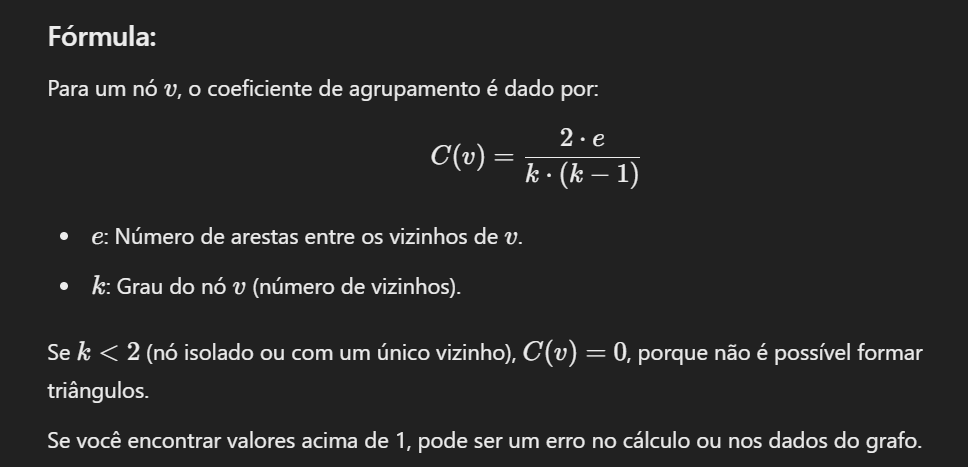

---

In [ ]:
# Função para exibir os 5 nós com maior centralidade de grau
def exibir_top5_centralidade(centralidades):
    # Ordenar os nós por centralidade em ordem decrescente
    top5 = sorted(centralidades.items(), key=lambda x: x[1], reverse=True)[:5]
    for node, centralidade in top5:
        print(f"Nó: {node}, Centralidade de Grau: {centralidade:.4f}")
    return top5

# Grafo Desinformação
print('Grafo Desinformação')
print("-" * 100)
degree_centrality_desinformacao = nx.degree_centrality(grafo_desinformacao)
top5_desinformacao = exibir_top5_centralidade(degree_centrality_desinformacao)

# Grafo Viral
print('Grafo Viral')
print("-" * 100)
degree_centrality_viral = nx.degree_centrality(grafo_viral)
top5_viral = exibir_top5_centralidade(degree_centrality_viral)

# Grafo Geral
print('Grafo Geral')
print("-" * 100)
degree_centrality_geral = nx.degree_centrality(grafo_geral)
top5_geral = exibir_top5_centralidade(degree_centrality_geral)



Grafo Desinformação
----------------------------------------------------------------------------------------------------
Nó: e6022a7e3955297a7a4c3028f0f2a99d, Centralidade de Grau: 0.1882
Nó: 3b7dfe232868b409b22d6717df3e3851, Centralidade de Grau: 0.1820
Nó: 5edf52cacaced85501ff2c59d316d696, Centralidade de Grau: 0.1798
Nó: 8df18722b28514d465d134a51692e054, Centralidade de Grau: 0.1418
Nó: e62278ba3dfa04daedc5b63dc592f2cb, Centralidade de Grau: 0.1413
Grafo Viral
----------------------------------------------------------------------------------------------------
Nó: 5edf52cacaced85501ff2c59d316d696, Centralidade de Grau: 0.1596
Nó: 3b7dfe232868b409b22d6717df3e3851, Centralidade de Grau: 0.1570
Nó: 83d61b8555f77383e6a699dafe5cca75, Centralidade de Grau: 0.1361
Nó: e62278ba3dfa04daedc5b63dc592f2cb, Centralidade de Grau: 0.1281
Nó: fb478218b280a00a1f1f61e87cf1aed3, Centralidade de Grau: 0.1275
Grafo Geral
------------------------------------------------------------------------------------

## **2. Clustering Coefficient (Coeficiente de Agrupamento)**  
- **O que é?**  
   Mede o grau em que os vizinhos de um nó estão conectados entre si, formando "triângulos" na rede.  

- **Importância:**  
   Um **alto coeficiente de agrupamento** indica que o nó faz parte de um grupo coeso, onde seus vizinhos também são conectados entre si.  

- **Cálculo:**  
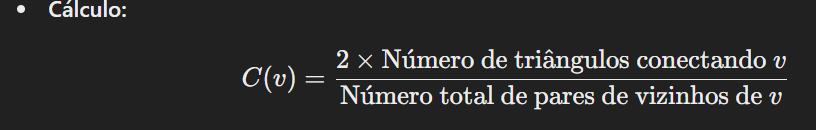

- **Aplicação:**  
   Em redes sociais, mede a probabilidade de amigos de uma pessoa serem também amigos entre si.  

- **Exemplo:**  
   Se você tem três amigos e todos são amigos entre si, o seu coeficiente de agrupamento será **1 (máximo)**.

---

In [ ]:
# Função auxiliar para exibir os 5 maiores coeficientes de agrupamento
def exibir_top5_clustering(grafo, nome):
    print(f'Grafo {nome}')
    print("-" * 100)
    clustering_coefficient = nx.clustering(grafo)  # Calcula o coeficiente de agrupamento para todos os nós

    # Ordenar os nós pelo coeficiente de agrupamento em ordem decrescente
    top5 = sorted(clustering_coefficient.items(), key=lambda item: item[1], reverse=True)[:5]

    print("Top 5 Clustering Coefficient (Nó, Valor):")
    for node, coef in top5:
        print(f"Nó: {node}, Coeficiente: {coef}")
    print()

# Grafo Desinformação
exibir_top5_clustering(grafo_desinformacao, "Desinformação")

# Grafo Viral
exibir_top5_clustering(grafo_viral, "Viral")

# Grafo Geral
exibir_top5_clustering(grafo_geral, "Geral")

Grafo Desinformação
----------------------------------------------------------------------------------------------------
Top 5 Clustering Coefficient (Nó, Valor):
Nó: 002694124837df32845e783edba3435a, Coeficiente: 1.0
Nó: 12c2b1a5b4bde26578e33be1164d77c0, Coeficiente: 1.0
Nó: 3d4e77cea17b1812993b55543e81400e, Coeficiente: 1.0
Nó: 455c52ceb8d6f492188beb4a465cc1f7, Coeficiente: 1.0
Nó: 78158d517e5b9f1eb29af254597c6fc1, Coeficiente: 1.0

Grafo Viral
----------------------------------------------------------------------------------------------------
Top 5 Clustering Coefficient (Nó, Valor):
Nó: 0000ccace97501f92535d131962ea97d, Coeficiente: 1.0
Nó: 26288cd05a9c9505cbc67490913624a8, Coeficiente: 1.0
Nó: 3409853e35408827a292026277c823c0, Coeficiente: 1.0
Nó: 736e4425e6cd37e7ed441642a324cbdd, Coeficiente: 1.0
Nó: 84865d2dc2e4f8f9e95fea3309d12ebe, Coeficiente: 1.0

Grafo Geral
----------------------------------------------------------------------------------------------------
Top 5 Clustering 

In [ ]:
def exibir_top5_grau(grafo, nome):
    print(f'Grafo {nome}')
    print("-" * 100)

    # Calcula o grau de todos os nós
    grau_nos = dict(grafo.degree())  # Retorna um dicionário {nó: grau}

    # Ordenar os nós pelo grau em ordem decrescente
    top5 = sorted(grau_nos.items(), key=lambda item: item[1], reverse=True)[:5]

    print("Top 5 Nós por Grau (Nó, Grau, Quantidade de Vértices Conectados):")
    for node, grau in top5:
        print(f"Nó: {node}, Grau: {grau}, Quantidade de Vértices Conectados: {grau}")
    print()


# Grafo Desinformação
# exibir_top5_clustering(grafo_desinformacao, "Desinformação")
exibir_top5_grau(grafo_desinformacao, "Desinformação")

Grafo Desinformação
----------------------------------------------------------------------------------------------------
Top 5 Nós por Grau (Nó, Grau, Quantidade de Vértices Conectados):
Nó: e6022a7e3955297a7a4c3028f0f2a99d, Grau: 426, Quantidade de Vértices Conectados: 426
Nó: 3b7dfe232868b409b22d6717df3e3851, Grau: 412, Quantidade de Vértices Conectados: 412
Nó: 5edf52cacaced85501ff2c59d316d696, Grau: 407, Quantidade de Vértices Conectados: 407
Nó: 8df18722b28514d465d134a51692e054, Grau: 321, Quantidade de Vértices Conectados: 321
Nó: e62278ba3dfa04daedc5b63dc592f2cb, Grau: 320, Quantidade de Vértices Conectados: 320



## **3. Closeness Centrality (Centralidade de Proximidade)**  
- **O que é?**  
   Mede a proximidade de um nó em relação a todos os outros nós da rede. É calculado com base na soma das distâncias mais curtas entre o nó e todos os outros nós.  

- **Importância:**  
   Um nó com alta centralidade de proximidade está **"mais perto"** de todos os outros nós, em termos de caminho mais curto.  

- **Cálculo:**  
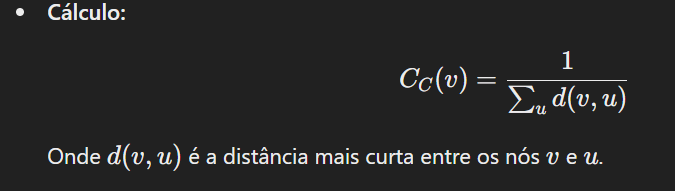   
   Onde \( d(v, u) \) é a distância mais curta entre os nós \( v \) e \( u \).  

- **Aplicação:**  
   Usado para identificar nós que podem acessar rapidamente o resto da rede (como em sistemas de transporte ou comunicação).  

- **Exemplo:**  
   Em uma rede de cidades, uma cidade com **alta centralidade de proximidade** está em uma localização estratégica com fácil acesso a todas as outras cidades.

---

In [ ]:
%%time

# Função para exibir os 5 nós com maior centralidade de proximidade
def exibir_top5_closeness(centralidades):
    # Ordenar os nós por centralidade em ordem decrescente
    top5 = sorted(centralidades.items(), key=lambda x: x[1], reverse=True)[:5]
    for node, centralidade in top5:
        print(f"Nó: {node}, Centralidade de Proximidade: {centralidade:.4f}")
    return top5

# Grafo Desinformação
print('Grafo Desinformação')
print("-" * 100)
closeness_centrality_desinformacao = nx.closeness_centrality(grafo_desinformacao)
top5_desinformacao = exibir_top5_closeness(closeness_centrality_desinformacao)

# Grafo Viral
print('Grafo Viral')
print("-" * 100)
closeness_centrality_viral = nx.closeness_centrality(grafo_viral)
top5_viral = exibir_top5_closeness(closeness_centrality_viral)

# Grafo Geral
print('Grafo Geral')
print("-" * 100)
closeness_centrality_geral = nx.closeness_centrality(grafo_geral)
top5_geral = exibir_top5_closeness(closeness_centrality_geral)


Grafo Desinformação
----------------------------------------------------------------------------------------------------
Nó: e6022a7e3955297a7a4c3028f0f2a99d, Centralidade de Proximidade: 0.2797
Nó: 5edf52cacaced85501ff2c59d316d696, Centralidade de Proximidade: 0.2793
Nó: 178b0761a1b0363a1493c3a30e033a45, Centralidade de Proximidade: 0.2785
Nó: a097eff4289253e672abfffe8ac488d5, Centralidade de Proximidade: 0.2785
Nó: 3b7dfe232868b409b22d6717df3e3851, Centralidade de Proximidade: 0.2747
Grafo Viral
----------------------------------------------------------------------------------------------------
Nó: 5edf52cacaced85501ff2c59d316d696, Centralidade de Proximidade: 0.2759
Nó: 6a8c33817fef00b8eeabe6ee5f05473d, Centralidade de Proximidade: 0.2746
Nó: 83d61b8555f77383e6a699dafe5cca75, Centralidade de Proximidade: 0.2733
Nó: 3b7dfe232868b409b22d6717df3e3851, Centralidade de Proximidade: 0.2678
Nó: fb478218b280a00a1f1f61e87cf1aed3, Centralidade de Proximidade: 0.2671
Grafo Geral
--------------

## **4. Betweenness Centrality (Centralidade de Intermediação)**  
- **O que é?**  
   Mede o número de vezes que um nó atua como **ponte** em caminhos mais curtos entre outros dois nós.  

- **Importância:**  
   Um nó com alta centralidade de intermediação tem **influência** na rede, pois controla o fluxo de informações ou recursos.  

- **Cálculo:**  
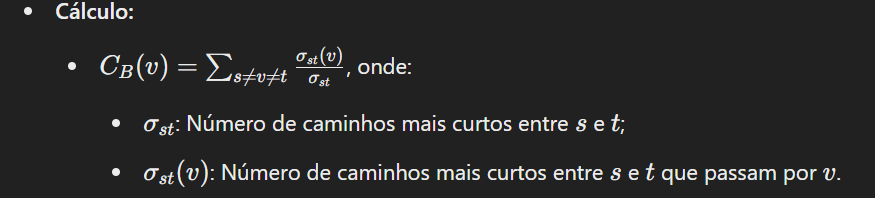

- **Aplicação:**  
   Usado para identificar pontos de controle em redes de transporte, sistemas de comunicação e redes sociais.  

- **Exemplo:**  
   Em uma rede de estradas, uma cidade com **alta centralidade de intermediação** está no meio de rotas importantes e controla o fluxo de tráfego.

---


In [ ]:
%%time
# Função para exibir os 5 nós com maior centralidade de intermediação
def exibir_top5_betweenness(centralidades):
    # Ordenar os nós por centralidade em ordem decrescente
    top5 = sorted(centralidades.items(), key=lambda x: x[1], reverse=True)[:5]
    for node, centralidade in top5:
        print(f"Nó: {node}, Centralidade de Intermediação: {centralidade:.4f}")
    return top5

# Grafo Desinformação
print('Grafo Desinformação')
print("-" * 100)
betweenness_centrality_desinformacao = nx.betweenness_centrality(grafo_desinformacao)
top5_desinformacao = exibir_top5_betweenness(betweenness_centrality_desinformacao)

# Grafo Viral
print('Grafo Viral')
print("-" * 100)
betweenness_centrality_viral = nx.betweenness_centrality(grafo_viral)
top5_viral = exibir_top5_betweenness(betweenness_centrality_viral)

# # Grafo Geral
# print('Grafo Geral')
# print("-" * 100)
# betweenness_centrality_geral = nx.betweenness_centrality(grafo_geral)
# top5_geral = exibir_top5_betweenness(betweenness_centrality_geral)


Grafo Desinformação
----------------------------------------------------------------------------------------------------
Nó: 36706644f7c225aac8f8e242ec4c2564, Centralidade de Intermediação: 0.0459
Nó: c00d4e066d14c58ab47fede0d24ae438, Centralidade de Intermediação: 0.0445
Nó: 5edf52cacaced85501ff2c59d316d696, Centralidade de Intermediação: 0.0381
Nó: d37dfcfab35d5e829262be74ec42d15a, Centralidade de Intermediação: 0.0317
Nó: e62278ba3dfa04daedc5b63dc592f2cb, Centralidade de Intermediação: 0.0289
Grafo Viral
----------------------------------------------------------------------------------------------------
Nó: 22f23e9271c1494ad787d35f01fe6f4f, Centralidade de Intermediação: 0.0353
Nó: 206d0d29a5a08bc83174955b2d3adc48, Centralidade de Intermediação: 0.0297
Nó: b24381227bb85308808144e1fe28e104, Centralidade de Intermediação: 0.0260
Nó: ba3cffd9754e8e71c08ac9401cb1748b, Centralidade de Intermediação: 0.0253
Nó: 5edf52cacaced85501ff2c59d316d696, Centralidade de Intermediação: 0.0230
CPU ti

## **Resumo das Métricas**

| **Métrica**                | **Significado**                               | **Importância**                              |
|----------------------------|---------------------------------------------|--------------------------------------------|
| **Degree Centrality**      | Número de conexões diretas de um nó          | Mede a popularidade/local influência       |
| **Clustering Coefficient** | Grau de conexão entre os vizinhos de um nó   | Mede coesão local e formação de grupos     |
| **Closeness Centrality**   | Proximidade média de um nó aos outros nós    | Mede eficiência de acesso na rede          |
| **Betweenness Centrality** | Frequência de um nó em caminhos mais curtos  | Mede influência como ponte na rede         |

---

# **Atributos de rede dos usuários**


In [ ]:

# Função para plotar um gráfico de barras dos top 10 usuários com maior grau
def plotar_top_10(metricas_ordenadas, grau):

    titulo = grau

    titulo_formatada = titulo.replace('_', ' ').title()

    top_10 = metricas_ordenadas[:10]
    usuarios = [x[0] for x in top_10]
    graus = [x[1][grau] for x in top_10]

    plt.figure(figsize=(10, 6))
    plt.bar(usuarios, graus, color='skyblue')
    plt.xlabel('Usuários')
    plt.ylabel(titulo_formatada)
    plt.title(f'Top 10 Usuários com Maior {titulo_formatada}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Função para ordenar as métricas por uma chave específica
def ordenar_metricas(metricas, chave):
    return sorted(metricas.items(), key=lambda x: x[1][chave], reverse=True)


- Grau de centralidade geral:
- Força geral:

Usuário ea2245384f7a41a1250227fc0950495b:
  Grau de Centralidade Geral: 1580
  Força Geral: 1580
----------------------------------------
Usuário 5edf52cacaced85501ff2c59d316d696:
  Grau de Centralidade Geral: 1338
  Força Geral: 1338
----------------------------------------
Usuário 3b7dfe232868b409b22d6717df3e3851:
  Grau de Centralidade Geral: 1273
  Força Geral: 1273
----------------------------------------
Usuário db163c719d8fe5031fbd48783d6554b1:
  Grau de Centralidade Geral: 1206
  Força Geral: 1206
----------------------------------------
Usuário b348ff97155fcbcfd7036153c89ddb68:
  Grau de Centralidade Geral: 1186
  Força Geral: 1186
----------------------------------------
Usuário e6022a7e3955297a7a4c3028f0f2a99d:
  Grau de Centralidade Geral: 1163
  Força Geral: 1163
----------------------------------------
Usuário 2d605bc24394c0da876e439c80785ca0:
  Grau de Centralidade Geral: 1134
  Força Geral: 1134
----------------------------------------
Usuário 83d61b8555f77383e6a699dafe

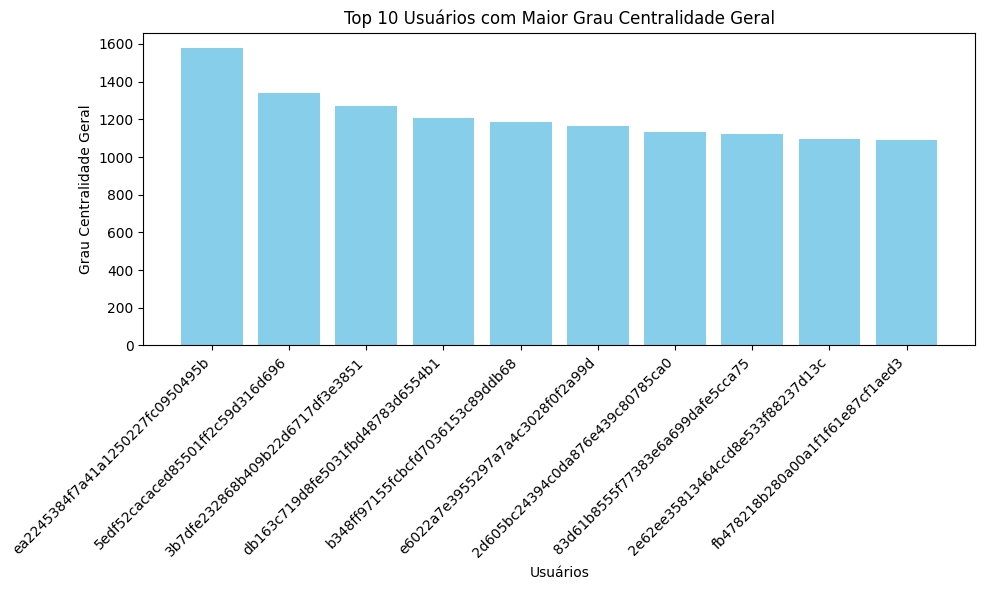

In [ ]:
import networkx as nx

# Função para calcular as métricas de rede dos usuários
def calcular_metricas(grafo):
    metricas = {}

    for node in grafo.nodes():
        # Grau de centralidade geral
        grau_centralidade_geral = len(list(grafo.neighbors(node)))

        # Força geral (somatório dos pesos de mensagens gerais)
        forca_geral = sum([grafo[u][v].get('peso', 1) for u, v in grafo.edges(node)])

        # Armazenando os resultados no dicionário
        metricas[node] = {
            'grau_centralidade_geral': grau_centralidade_geral,
            'forca_geral': forca_geral,
        }

    return metricas

# Calcular as métricas
metricas = calcular_metricas(grafo_geral)

# Ordenar os resultados por "grau_centralidade_geral" e exibir
metricas_ordenadas = ordenar_metricas(metricas, 'grau_centralidade_geral')

# Exibir os 10 primeiros resultados
top_10_metricas = metricas_ordenadas[:10]

for usuario, metrica in top_10_metricas:
    print(f"Usuário {usuario}:")
    print(f"  Grau de Centralidade Geral: {metrica['grau_centralidade_geral']}")
    print(f"  Força Geral: {metrica['forca_geral']}")
    print("-" * 40)

# Gerar gráfico
plotar_top_10(metricas_ordenadas, 'grau_centralidade_geral')

- Grau de centralidade viral:
- Força viral:

Usuário 5edf52cacaced85501ff2c59d316d696:
  Grau de Centralidade Viral: 556
  Força Viral: 556
----------------------------------------
Usuário 3b7dfe232868b409b22d6717df3e3851:
  Grau de Centralidade Viral: 547
  Força Viral: 547
----------------------------------------
Usuário 83d61b8555f77383e6a699dafe5cca75:
  Grau de Centralidade Viral: 474
  Força Viral: 474
----------------------------------------
Usuário e62278ba3dfa04daedc5b63dc592f2cb:
  Grau de Centralidade Viral: 446
  Força Viral: 446
----------------------------------------
Usuário fb478218b280a00a1f1f61e87cf1aed3:
  Grau de Centralidade Viral: 444
  Força Viral: 444
----------------------------------------
Usuário 8df18722b28514d465d134a51692e054:
  Grau de Centralidade Viral: 441
  Força Viral: 441
----------------------------------------
Usuário 6a8c33817fef00b8eeabe6ee5f05473d:
  Grau de Centralidade Viral: 439
  Força Viral: 439
----------------------------------------
Usuário 0eadc6a722c927f976244c702d2ee744:
  Grau

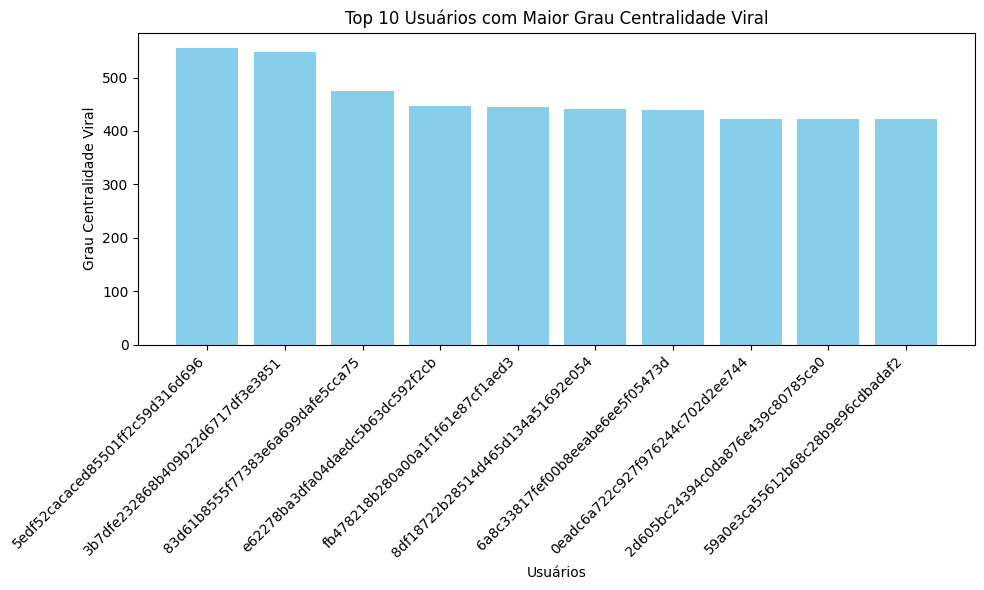

In [ ]:
import networkx as nx

# Função para calcular as métricas de rede dos usuários
def calcular_metricas(grafo):
    metricas = {}

    for node in grafo.nodes():
        # Grau de centralidade viral
        grau_centralidade_viral = len([1 for u, v in grafo.edges(node) if grafo[u][v].get('relationship_type', '') == 'viral'])

        # Força viral (somatório dos pesos de mensagens virais)
        forca_viral = sum([grafo[u][v].get('peso', 1) for u, v in grafo.edges(node) if grafo[u][v].get('relationship_type', '') == 'viral'])

        # Armazenando os resultados no dicionário
        metricas[node] = {
            'grau_centralidade_viral': grau_centralidade_viral,
            'forca_viral': forca_viral,
        }

    return metricas


# Calcular as métricas
metricas = calcular_metricas(grafo_viral)

# Ordenar os resultados por "grau_centralidade_viral" e exibir
metricas_ordenadas = ordenar_metricas(metricas, 'grau_centralidade_viral')

# Exibir os 10 primeiros resultados
top_10_metricas = metricas_ordenadas[:10]

for usuario, metrica in top_10_metricas:
    print(f"Usuário {usuario}:")
    print(f"  Grau de Centralidade Viral: {metrica['grau_centralidade_viral']}")
    print(f"  Força Viral: {metrica['forca_viral']}")
    print("-" * 40)


# Gerar gráfico
plotar_top_10(metricas_ordenadas, 'grau_centralidade_viral')

- Grau de centralidade de desinformação:
- Força de desinformação:

Usuário e6022a7e3955297a7a4c3028f0f2a99d:
  Grau de Centralidade de Desinformação: 426
  Força de Desinformação: 426
----------------------------------------
Usuário 3b7dfe232868b409b22d6717df3e3851:
  Grau de Centralidade de Desinformação: 412
  Força de Desinformação: 412
----------------------------------------
Usuário 5edf52cacaced85501ff2c59d316d696:
  Grau de Centralidade de Desinformação: 407
  Força de Desinformação: 407
----------------------------------------
Usuário 8df18722b28514d465d134a51692e054:
  Grau de Centralidade de Desinformação: 321
  Força de Desinformação: 321
----------------------------------------
Usuário e62278ba3dfa04daedc5b63dc592f2cb:
  Grau de Centralidade de Desinformação: 320
  Força de Desinformação: 320
----------------------------------------
Usuário 7504287183444470e99dcc2c250cfeec:
  Grau de Centralidade de Desinformação: 308
  Força de Desinformação: 308
----------------------------------------
Usuário eeff646ed891dc38ce53dcd13efe2088:
  Grau de 

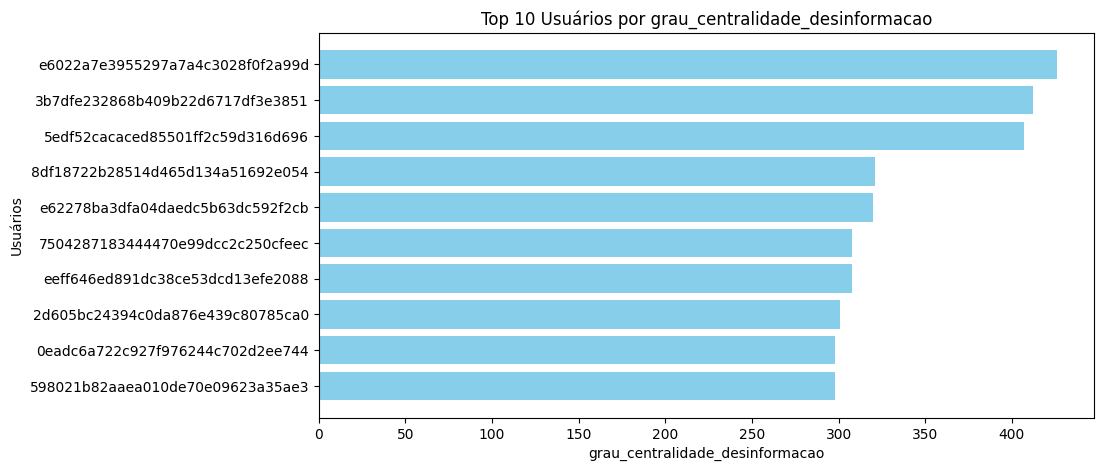

In [ ]:

# Função para calcular as métricas de rede dos usuários
def calcular_metricas(grafo):
    metricas = {}

    for node in grafo.nodes():

        # Grau de centralidade de desinformação
        grau_centralidade_desinformacao = len([1 for u, v in grafo.edges(node) if grafo[u][v].get('relationship_type', '') == 'misinformation'])

        # Força de desinformação (somatório dos pesos de mensagens de desinformação)
        forca_desinformacao = sum([grafo[u][v].get('peso', 1) for u, v in grafo.edges(node) if grafo[u][v].get('relationship_type', '') == 'misinformation'])

        # Armazenando os resultados no dicionário
        metricas[node] = {
            'grau_centralidade_desinformacao': grau_centralidade_desinformacao,
            'forca_desinformacao': forca_desinformacao
        }

    return metricas


# Função para ordenar as métricas
def ordenar_metricas(metricas, chave):
    return sorted(metricas.items(), key=lambda item: item[1][chave], reverse=True)

# Função para gerar o gráfico
def plotar_top_10(metricas_ordenadas, chave):
    import matplotlib.pyplot as plt

    top_10 = metricas_ordenadas[:10]  # Pegando os 10 maiores
    usuarios = [str(usuario) for usuario, _ in top_10]
    valores = [metrica[chave] for _, metrica in top_10]

    plt.figure(figsize=(10, 5))
    plt.barh(usuarios, valores, color='skyblue')
    plt.xlabel(chave)
    plt.ylabel('Usuários')
    plt.title(f'Top 10 Usuários por {chave}')
    plt.gca().invert_yaxis()  # Inverter a ordem no eixo Y para exibir o maior no topo
    plt.show()


# Calcular as métricas
metricas = calcular_metricas(grafo_desinformacao)

# Ordenar os resultados por "grau_centralidade_desinformacao"
metricas_ordenadas = ordenar_metricas(metricas, 'grau_centralidade_desinformacao')

# Exibir os 10 primeiros resultados
top_10_metricas = metricas_ordenadas[:10]

for usuario, metrica in top_10_metricas:
    print(f"Usuário {usuario}:")
    print(f"  Grau de Centralidade de Desinformação: {metrica['grau_centralidade_desinformacao']}")
    print(f"  Força de Desinformação: {metrica['forca_desinformacao']}")
    print("-" * 40)

# Gerar gráfico dos top 10
plotar_top_10(top_10_metricas, 'grau_centralidade_desinformacao')

# **Métricas de Redes Complexas**

## **1. Giant Component (Componente Gigante)**  
- **O que é?**  
   Refere-se ao maior subgrafo conectado em uma rede, onde todos os nós são alcançáveis entre si.  
   Em grandes redes, a componente gigante tende a conter a maioria dos nós.  

- **Importância:**  
   - Permite analisar a **conectividade global** da rede.  
   - A existência de um componente gigante indica que uma fração significativa da rede está interconectada.  

- **Aplicação:**  
   Utilizada em redes de comunicação, redes sociais e biológicas para identificar o maior conjunto interligado de nós.  

- **Exemplo:**  
   Em uma rede social, o componente gigante representa a maior comunidade onde todas as pessoas têm um caminho indireto entre si.  

---

## **2. Density (Densidade)**  
- **O que é?**  
   A densidade mede o quão **conectada** é uma rede em relação ao número máximo possível de conexões.  

- **Cálculo:**  
   \[
   D = \frac{2 \times m}{n \times (n - 1)}
   \]  
   Onde:  
   - \( m \): Número de arestas na rede;  
   - \( n \): Número de nós na rede.  

- **Importância:**  
   - Uma rede com densidade **próxima de 1** é **altamente conectada**.  
   - Uma densidade **baixa** indica uma rede esparsa.  

- **Aplicação:**  
   Usada para analisar a conectividade em redes sociais, redes de transporte e redes biológicas.  

- **Exemplo:**  
   Em um grafo com \( n = 5 \) nós e \( m = 4 \) arestas, a densidade seria:  
   \[
   D = \frac{2 \times 4}{5 \times (5 - 1)} = 0.4
   \]  
   Isso indica uma rede **moderadamente conectada**.  

---

## **3. Diameter (Diâmetro)**  
- **O que é?**  
   O diâmetro de uma rede é a **maior distância geodésica** (caminho mais curto) entre quaisquer dois nós na rede.  

- **Importância:**  
   - Mede a **eficiência** da propagação de informações ou recursos na rede.  
   - Redes com um diâmetro pequeno são **altamente conectadas** e permitem uma comunicação rápida.  

- **Cálculo:**  
   O diâmetro é o **maior valor** entre todas as distâncias mais curtas entre pares de nós.  

- **Aplicação:**  
   Utilizado para medir a eficiência em redes de comunicação, redes sociais e redes de transporte.  

- **Exemplo:**  
   Em uma rede onde o caminho mais longo entre dois nós tem 4 arestas, o diâmetro é igual a **4**.  

---

## **Resumo das Métricas**

| **Métrica**           | **Significado**                                | **Importância**                                 |
|-----------------------|----------------------------------------------|-----------------------------------------------|
| **Giant Component**   | Maior subgrafo conectado                     | Mede a conectividade global da rede           |
| **Density**           | Proporção entre arestas existentes e máximas | Mede o grau de conectividade da rede          |
| **Diameter**          | Maior distância entre dois nós na rede       | Mede a eficiência da propagação de informações |

---

Se precisar de exemplos práticos ou **códigos em Python** para calcular essas métricas (usando bibliotecas como NetworkX), estou à disposição! 🚀


In [ ]:
# Função para calcular as métricas
def calcular_metricas(G):
    # Giant Coefficient (Coeficiente da Maior Componente Conectada)
    if nx.is_connected(G):
        giant_coefficient = nx.average_clustering(G)  # Média do coeficiente de aglomeração
        #giant_coefficient = nx.giant_coefficient(G)
    else:
        # Para grafos desconexos, encontramos a maior componente conectada
        largest_component = max(nx.connected_components(G), key=len)
        G_largest = G.subgraph(largest_component)
        giant_coefficient = nx.average_clustering(G_largest)  # Média do coeficiente de aglomeração

    # Density (Densidade)
    density = nx.density(G)

    # Diameter (Diâmetro)
    if nx.is_connected(G):
        diameter = nx.diameter(G)
    else:
        largest_component = max(nx.connected_components(G), key=len)
        G_largest = G.subgraph(largest_component)
        diameter = nx.diameter(G_largest)

    return giant_coefficient, density, diameter



# Calculando as métricas para cada grafo

def metricas_para_cada_grafo(grafo,tipo):
    print(f"Métricas para o grafo {tipo}:")
    giant_coefficient, density, diameter = calcular_metricas(grafo)
    print(f"Giant Coefficient: {giant_coefficient}")
    print(f"Density: {density}")
    print(f"Diameter: {diameter}")
    print("-----------")


# **Métricas para o grafo Geral**
- Giant Coefficient
- Density
- Diameter

In [ ]:
# def calcular_metricas(G):
#     # Giant Coefficient (Coeficiente da Maior Componente Conectada)
#     if nx.is_connected(G):
#         giant_coefficient = nx.average_clustering(G)
#     else:
#         largest_component = max(nx.connected_components(G), key=len)
#         G_largest = G.subgraph(largest_component)
#         giant_coefficient = nx.average_clustering(G_largest)

#     # Density (Densidade)
#     density = nx.density(G)

#     # Approximate Diameter or Average Shortest Path Length
#     if nx.is_connected(G):
#         avg_shortest_path = nx.average_shortest_path_length(G)
#     else:
#         largest_component = max(nx.connected_components(G), key=len)
#         G_largest = G.subgraph(largest_component)
#         avg_shortest_path = nx.average_shortest_path_length(G_largest)

#     return giant_coefficient, density, avg_shortest_path


# #metricas_para_cada_grafo(grafo_geral,"Geral")
# calcular_metricas(grafo_geral)

# **Métricas para o Grafo Viral**
- Giant Coefficient
- Density
- Diameter

In [ ]:
%%time
metricas_para_cada_grafo(grafo_viral,'Viral')

Métricas para o grafo Viral:
Giant Coefficient: 0.9576923754888909
Density: 0.020901587602964438
Diameter: 8
-----------
CPU times: total: 3min 43s
Wall time: 4min 50s


# **Métricas para o Grafo de Desinformação**
- Giant Coefficient
- Density
- Diameter

In [ ]:
%%time
metricas_para_cada_grafo(grafo_desinformacao,'Desinformação')

Métricas para o grafo Desinformação:
Giant Coefficient: 0.961622399589829
Density: 0.02278644919227139
Diameter: 10
-----------
CPU times: total: 1min 27s
Wall time: 1min 52s


Salvamento nos Arquivos Pajek:

- .net: Salva o grafo no formato Pajek com as arestas.
- .clu: Cria uma partição simples baseada na centralidade de grau.
- .hie: Salva uma hierarquia dos nós com base na centralidade de proximidade.
- .vec: Salva atributos de cada nó, como grau, centralidade de grau,
centralidade de betweenness e centralidade de proximidade.
- .cls é utilizado para representar a partição dos nós, ou seja, ele mapeia os nós para diferentes classes ou grupos.

In [ ]:
%%time
import networkx as nx
import os

# Função para salvar os grafos em formatos Pajek com atributos reais
def salvar_pajek(grafo, nome_base, random_state=None):
    # Certificar-se de que o diretório existe
    diretorio = os.path.dirname(nome_base)
    if not os.path.exists(diretorio):
        os.makedirs(diretorio)

    # Salvar em formato .net (Rede)
    nx.write_pajek(grafo, f"{nome_base}.net")

    # Salvar em formato .clu (Partições)
    # Aqui vamos usar uma partição baseada na centralidade de grau, por exemplo
    centralidade_grau = nx.degree_centrality(grafo)
    particao = {node: int(centralidade_grau[node] > 0.1) for node in grafo.nodes()}  # Exemplo simples: partição binária
    with open(f"{nome_base}.clu", 'w') as f:
        for node, group in particao.items():
            f.write(f"{node} {group}\n")

    # Salvar em formato .cls (Partições)
    # Vamos usar centralidade de grau para dividir em duas classes (abaixo ou acima da mediana)
    mediana = sorted(centralidade_grau.values())[len(centralidade_grau)//2]
    particao = {node: 1 if centralidade_grau[node] > mediana else 0 for node in grafo.nodes()}
    with open(f"{nome_base}.cls", 'w') as f:
        for node, group in particao.items():
            f.write(f"{node} {group}\n")

    # Salvar em formato .hie (Hierarquia)
    # Exemplo de hierarquia: usando centralidade de proximidade
    centralidade_proximidade = nx.closeness_centrality(grafo)
    with open(f"{nome_base}.hie", 'w') as f:
        f.write("*Arvore\n")
        for node, centralidade in sorted(centralidade_proximidade.items(), key=lambda item: item[1], reverse=True):
            f.write(f"{node}\n")

    # Salvar em formato .vec (Vetores)
    centralidade_betweenness = nx.betweenness_centrality(grafo)
    with open(f"{nome_base}.vec", 'w') as f:
        f.write(f"*Vertices {len(grafo.nodes())}\n")  # Número de nós
        for node in grafo.nodes():
            grau = grafo.degree(node)
            f.write(f"{node} {grau} {centralidade_grau[node]} {centralidade_betweenness[node]} {centralidade_proximidade[node]}\n")

    # Salvar em formato .perm (Permutação)
    if random_state is not None:
        random.seed(random_state)  # Para reprodutibilidade
    permutacao = list(grafo.nodes())
    random.shuffle(permutacao)  # Embaralha os nós
    with open(f"{nome_base}.per", 'w') as f:
        for node in permutacao:
            f.write(f"{node}\n")


# Criar os grafos a partir dos dados
# grafos = criar_grafos(df_amostra)
# grafo_geral = grafos["geral"]
# grafo_viral = grafos["viral"]
# grafo_desinformacao = grafos["desinformacao"]

# # Salvar os grafos em formato Pajek
# salvar_pajek(grafo_geral, r"E:/Repositorio_Git/zz-grafos/para_arquivo_pajek/grafo_geral")
# salvar_pajek(grafo_viral, r"E:/Repositorio_Git/zz-grafos/para_arquivo_pajek/grafo_viral")
# salvar_pajek(grafo_desinformacao, r"E:/Repositorio_Git/zz-grafos/para_arquivo_pajek/grafo_desinformacao")

# print("Arquivos Pajek salvos com sucesso.")


CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
import random
import networkx as nx

def amostrar_subgrafo_nos_e_arestas(grafo, frac_nos=0.5, frac_arestas=0.5, random_state=None):
    if random_state is not None:
        random.seed(random_state)

    # Converter os nós em uma lista
    lista_nos = list(grafo.nodes)

    # Amostrar nós
    num_nos = int(len(lista_nos) * frac_nos)
    nos_amostrados = set(random.sample(lista_nos, num_nos))

    # Amostrar arestas somente entre os nós selecionados
    arestas_candidatas = [e for e in grafo.edges if e[0] in nos_amostrados and e[1] in nos_amostrados]
    num_arestas = int(len(arestas_candidatas) * frac_arestas)
    arestas_amostradas = random.sample(arestas_candidatas, num_arestas)

    # Criar o subgrafo
    subgrafo = nx.Graph()
    subgrafo.add_edges_from(arestas_amostradas)
    return subgrafo





Amostragens

In [ ]:
%%time

subgrafo_amostra_desinformacao = amostrar_subgrafo_nos_e_arestas(grafo_desinformacao, frac_nos=0.5, frac_arestas=0.6, random_state=42)
subgrafo_amostra_viral = amostrar_subgrafo_nos_e_arestas(grafo_viral, frac_nos=0.5, frac_arestas=0.6, random_state=42)
subgrafo_amostra_geral = amostrar_subgrafo_nos_e_arestas(grafo_geral, frac_nos=0.5, frac_arestas=0.6, random_state=42)
#salvar_pajek(subgrafo_amostra_desinformacao, r"E:/Repositorio_Git/zz-grafos/para_arquivo_pajek/subgrafo_amostra_desinformacao")
#salvar_pajek(subgrafo_amostra_viral, r"E:/Repositorio_Git/zz-grafos/para_arquivo_pajek/subgrafo_amostra_viral")
#salvar_pajek(subgrafo_amostra_geral, r"E:/Repositorio_Git/zz-grafos/para_arquivo_pajek/subgrafo_amostra_geral")

CPU times: total: 438 ms
Wall time: 607 ms


In [ ]:
 # Salvar os grafos em formato Pajek
# salvar_pajek(grafo_geral, r"E:/Repositorio_Git/zz-grafos/para_arquivo_pajek/grafo_geral")
# salvar_pajek(grafo_viral, r"E:/Repositorio_Git/zz-grafos/para_arquivo_pajek/grafo_viral")
# salvar_pajek(subgrafo_amostra_desinformacao, r"E:/Repositorio_Git/zz-grafos/para_arquivo_pajek/grafo_desinformacao")

# print("Arquivos Pajek salvos com sucesso.")

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Função para visualizar o grafo com ajustes
def visualizar_grafo(grafo, cor_nos, titulo, amostra_nos=2774):
    print(f"{titulo}: {len(grafo.nodes())} nós e {len(grafo.edges())} arestas.")

    # Amostrar um subconjunto de nós para visualização (opcional)
    if len(grafo.nodes()) > amostra_nos:
        print(f"Reduzindo para {amostra_nos} nós para visualização.")
        subgraph_nodes = list(grafo.nodes())[:amostra_nos]
        grafo = grafo.subgraph(subgraph_nodes)

    # Verificar se o grafo não está vazio
    if len(grafo.nodes()) == 0:
        print(f"O grafo '{titulo}' está vazio após a amostragem.")
        return

    # Gerar layout espaçado
    pos = nx.spring_layout(grafo, k=0.3, seed=42)  # Ajuste k para espaçamento

    # Desenhar o grafo
    plt.figure(figsize=(12, 10))
    nx.draw(
        grafo,
        pos,
        with_labels=False,
        node_color=cor_nos,
        node_size=50,  # Tamanho dos nós
        edge_color="gray",
        alpha=0.7,
    )
    plt.title(titulo, size=15)
    plt.show()

# Visualizar os grafos ajustados
visualizar_grafo(subgrafo_amostra_geral, "skyblue", "Grafo de Mensagens Gerais")
visualizar_grafo(subgrafo_amostra_viral, "lightgreen", "Grafo de Mensagens Virais")
visualizar_grafo(subgrafo_amostra_desinformacao, "lightcoral", "Grafo de Mensagens com Desinformação")

Output hidden; open in https://colab.research.google.com to view.

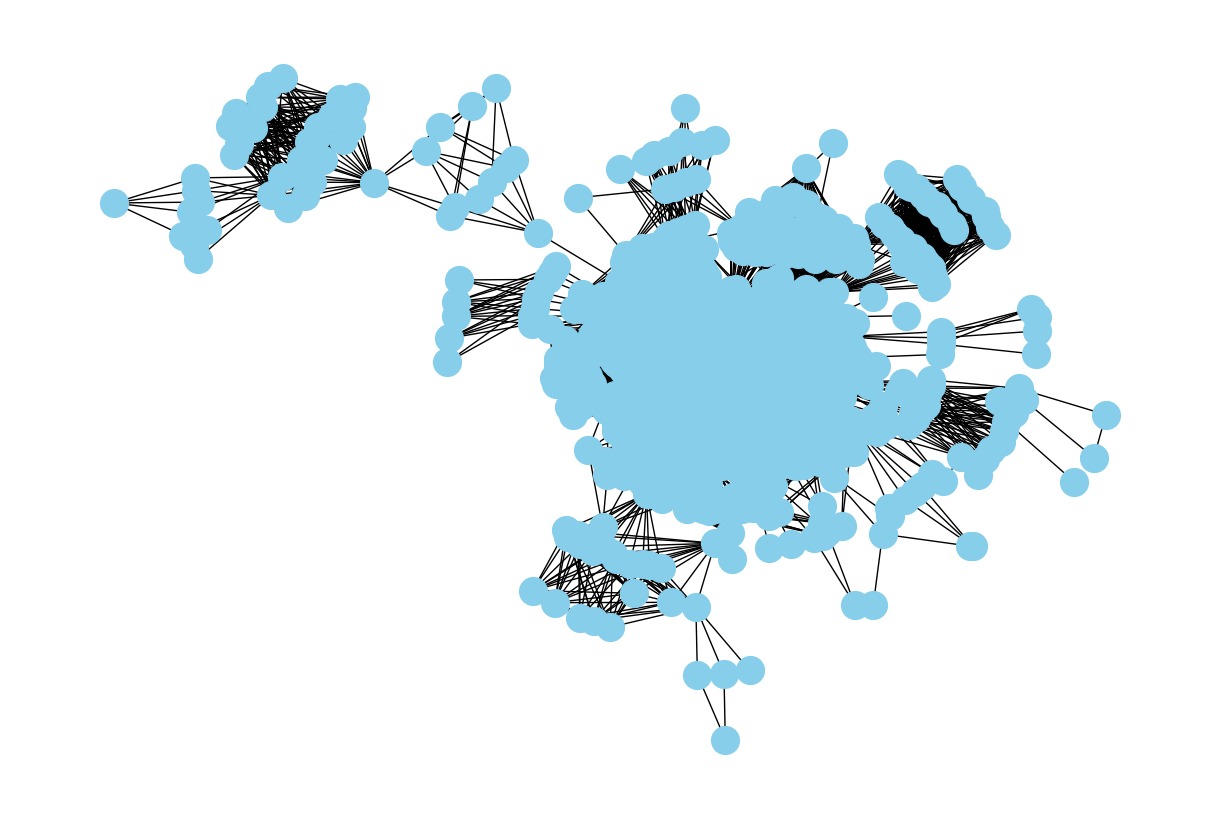

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Gerar o layout usando Kamada-Kawai
pos = nx.kamada_kawai_layout(subgrafo_amostra_desinformacao)

# Definir o tamanho da figura
plt.figure(figsize=(12, 8))  # Ajuste o tamanho conforme necessário (largura, altura)

# Desenhar o grafo sem exibir os rótulos
nx.draw(
    subgrafo_amostra_desinformacao,
    pos,
    with_labels=False,  # Não exibe os rótulos dos nós
    node_color="skyblue",
    node_size=400,
    font_weight="bold"
)

plt.show()


In [7]:
def criar_grafo_para_excel(grafo, caminho):


    # Renomear colunas e preparar os dados
    dados_nos = pd.DataFrame(grafo.nodes(data=True), columns=["ID", "Atributos"])
    dados_arestas = pd.DataFrame(grafo.edges(data=True), columns=["Origem", "Destino", "Atributos"])

    # Expandir atributos dos nós
    if not dados_nos.empty and isinstance(dados_nos.iloc[0, 1], dict):
        dados_nos = pd.concat([dados_nos.drop(columns="Atributos"), pd.json_normalize(dados_nos["Atributos"])], axis=1)

    # Expandir atributos das arestas
    if not dados_arestas.empty and isinstance(dados_arestas.iloc[0, 2], dict):
        dados_arestas = pd.concat([dados_arestas.drop(columns="Atributos"), pd.json_normalize(dados_arestas["Atributos"])], axis=1)

    # Renomear as colunas de origem e destino para 'Source' e 'Target' (formato esperado pelo Gephi)
    dados_arestas = dados_arestas.rename(columns={"Origem": "Source", "Destino": "Target"})

    # Exportar para Excel

    with pd.ExcelWriter(caminho) as writer:
        dados_nos.to_excel(writer, sheet_name="Nós", index=False)
        dados_arestas.to_excel(writer, sheet_name="Arestas", index=False)

    print(f"Arquivo exportado para {caminho}!")



In [8]:

criar_grafo_para_excel(grafo_desinformacao,r"E:\Repositorio_Git\zz-grafos\para_arquivo_gephi\grafo_desinformacao_excel.xlsx")
criar_grafo_para_excel(grafo_viral,r"E:\Repositorio_Git\zz-grafos\para_arquivo_gephi\grafo_viral_excel.xlsx")
criar_grafo_para_excel(grafo_geral,r"E:\Repositorio_Git\zz-grafos\para_arquivo_gephi\grafo_geral_excel.xlsx")

Arquivo exportado para E:\Repositorio_Git\zz-grafos\para_arquivo_gephi\grafo_desinformacao_excel.xlsx!
Arquivo exportado para E:\Repositorio_Git\zz-grafos\para_arquivo_gephi\grafo_viral_excel.xlsx!
Arquivo exportado para E:\Repositorio_Git\zz-grafos\para_arquivo_gephi\grafo_geral_excel.xlsx!
